In [1]:
from setup import set_project_root
set_project_root()

from config import DATA_FILE, DROP_COLS, TARGET, DESTINATION_FRAME, NULL_FILE, CLEAN_FILE


Current working directory: /home/exodia/Documentos/TFBigData


In [2]:
import pyarrow.parquet as pq
import pandas as pd
import h2o
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from src.analysis import ( data_quality,
                          enhanced_analysis,
                          summary_analysis,
                          univariate_analysis,
                          visualization )

# Importar funciones principales
from src.descriptive_analysis import (
    load_and_validate_data,
    create_niche_analysis_plots,
    analyze_property_types,
    analyze_market_behavior,
    analyze_market_segmentation,
    run_complete_descriptive_analysis,
    export_results_to_csv,
    generate_summary_report,
    configure_plot_style,
    analyze_seasonal_patterns,
    create_market_segmentation_plots,
    print_segmentation_insights,
    create_market_behavior_plots
)


# 02 - Análisis Descriptivo

## Objetivo

**Análisis exhaustivo del mercado inmobiliario danés** que incluye:

- **KPIs regionales**: Precios, volumen y competitividad por zona geográfica
- **Evolución temporal**: Tendencias anuales, estacionales y patrones de mercado  
- **Diferenciación por tipo**: Comparativa de precios y características por tipo de propiedad
- **Comportamiento de mercado**: Canales de venta, negociación y tiempo en mercado
- **Segmentación**: Identificación de segmentos de mercado y oportunidades

**Dataset**: Dataset limpio

# 1. KPIs por Región

Análisis completo de indicadores clave de performance del mercado inmobiliario danés por región geográfica.

- 1.2 Precio por m² por región  
- 1.3 Volumen de transacciones por región
- 1.1 Precio promedio y mediano por región
- 1.4 Ranking de regiones más caras/baratas
- 1.5 Visualizaciones geográficas

In [3]:
# Configurar estilo de visualizaciones
configure_plot_style()

# Cargar datos usando la función del módulo
df_clean = load_and_validate_data(data_path=CLEAN_FILE, destination_frame=DESTINATION_FRAME, parallel=False)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "17.0.8" 2023-07-18; OpenJDK Runtime Environment Temurin-17.0.8+7 (build 17.0.8+7); OpenJDK 64-Bit Server VM Temurin-17.0.8+7 (build 17.0.8+7, mixed mode, sharing)
  Starting server from /home/exodia/miniconda3/envs/TFBigData/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4lpbgw7m
  JVM stdout: /tmp/tmp4lpbgw7m/h2o_exodia_started_from_python.out
  JVM stderr: /tmp/tmp4lpbgw7m/h2o_exodia_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Lima
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,3 months and 15 days
H2O_cluster_name:,H2O_from_python_exodia_dgldmj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6.723 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Importando datos desde /home/exodia/Documentos/TFBigData/data/processed/cleaned_data.parquet

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Datos importados a H2O con destino: datos_h2o

Dimensiones del H2OFrame: 1,506,591 filas × 19 columnas

Datos cargados: 1,506,591 registros x 19 columnas
Período: 694569600000000000 - 1727654400000000000
Regiones: 4
Rango precios: 250,010 - 46,800,000 DKK


### 1.1 Precio Promedio y Mediano por Región

Análisis estadístico de precios por región con intervalos de confianza y ranking comparativo.

In [4]:
# === 1.1 ANÁLISIS REGIONAL DE PRECIOS ===
# Importar funciones específicas del módulo
from src.descriptive_analysis import (
    analyze_regional_prices,
    print_regional_summary,
    create_regional_price_plots,
    print_regional_insights,
    analyze_sqm_prices,
    create_ranking_comparison
)

print("🏢 ANÁLISIS REGIONAL COMPLETO")
print("=" * 50)

# Ejecutar análisis regional
regional_stats = analyze_regional_prices(df_clean)
top_regions = print_regional_summary(regional_stats)
display(top_regions)

🏢 ANÁLISIS REGIONAL COMPLETO
ESTADÍSTICAS DE PRECIOS POR REGIÓN
Total regiones analizadas: 4
Rango precios promedio: 1,203,900 - 2,381,799 DKK

TOP 10 REGIONES MÁS CARAS
----------------------------------------


,Transacciones,Promedio,Mediana,Std,Q1,Q3,Minimo,Maximo,CI_Lower,CI_Upper
region,,,,,,,,,,
Zealand,597090,2381799.0,1844002.0,2020751.0,1000000.0,3125000.0,250034,46800000,1590586.0,1606041.0
Jutland,755183,1619517.0,1200000.0,1508674.0,710000.0,2000000.0,250010,45000000,1616114.0,1622919.0
Fyn & islands,138425,1598314.0,1200000.0,1466908.0,740000.0,1965000.0,250062,45955000,1185220.0,1222579.0
Bornholm,15893,1203900.0,895000.0,1201383.0,580000.0,1432505.0,250750,23500000,2376673.0,2386925.0


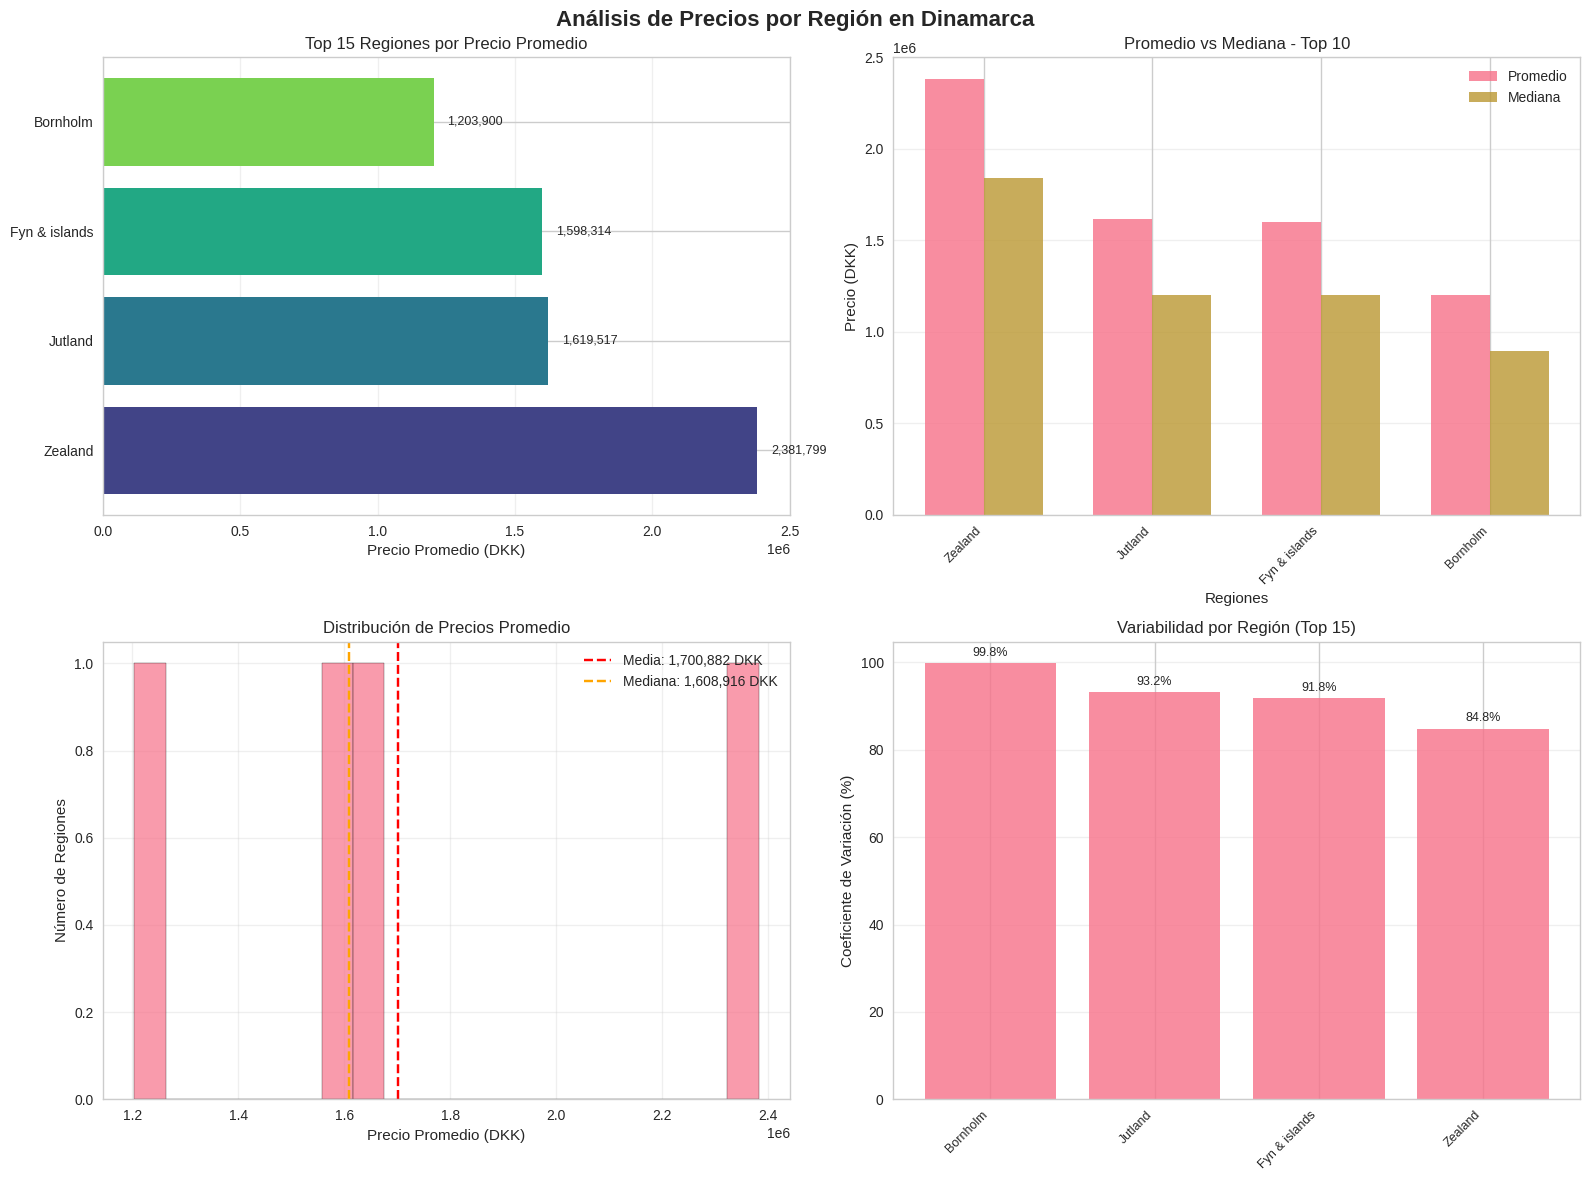


INSIGHTS CLAVE - PRECIOS REGIONALES
Región más cara: Zealand (2,381,799 DKK)
Región más económica: Bornholm (1,203,900 DKK)
Ratio precio max/min: 2.0x
Regiones sobre la media: 1
CV promedio: 92.4%

ANÁLISIS DE PRECIO POR M²
💰 Precio/m² promedio nacional: 16,342 DKK/m²
🏆 Umbral mercado premium: 21,311 DKK/m²

Comparación rankings precio total vs precio/m²:


,Region,Precio_Total,Precio_m2,Rank_Total,Rank_m2,Diferencia_Rank
0,Zealand,2381799.0,20803.0,1,1,0
1,Jutland,1619517.0,13422.0,2,2,0
2,Fyn & islands,1598314.0,13657.0,3,3,0
3,Bornholm,1203900.0,10884.0,4,4,0


In [5]:
# === VISUALIZACIONES Y ANÁLISIS REGIONAL COMPLETO ===

# 1. Crear visualizaciones regionales
cv_data = create_regional_price_plots(regional_stats, df_clean)
print_regional_insights(regional_stats, cv_data)

print("\n" + "="*60)

# 2. Análisis de precio por m²
sqm_stats, premium_threshold = analyze_sqm_prices(df_clean)
comparison_df = create_ranking_comparison(regional_stats, sqm_stats)

print("ANÁLISIS DE PRECIO POR M²")
print("=" * 40)
print(f"💰 Precio/m² promedio nacional: {df_clean['sqm_price'].mean():,.0f} DKK/m²")
print(f"🏆 Umbral mercado premium: {premium_threshold:,.0f} DKK/m²")

print("\nComparación rankings precio total vs precio/m²:")
display(comparison_df.head(10))

---

# 2. Análisis Temporal

Evolución del mercado inmobiliario danés a través del tiempo con identificación de tendencias y patrones estacionales.

- 2.1 Evolución anual de precios
- 2.2 Análisis de tendencias por región  
- 2.3 Patrones estacionales y ciclos

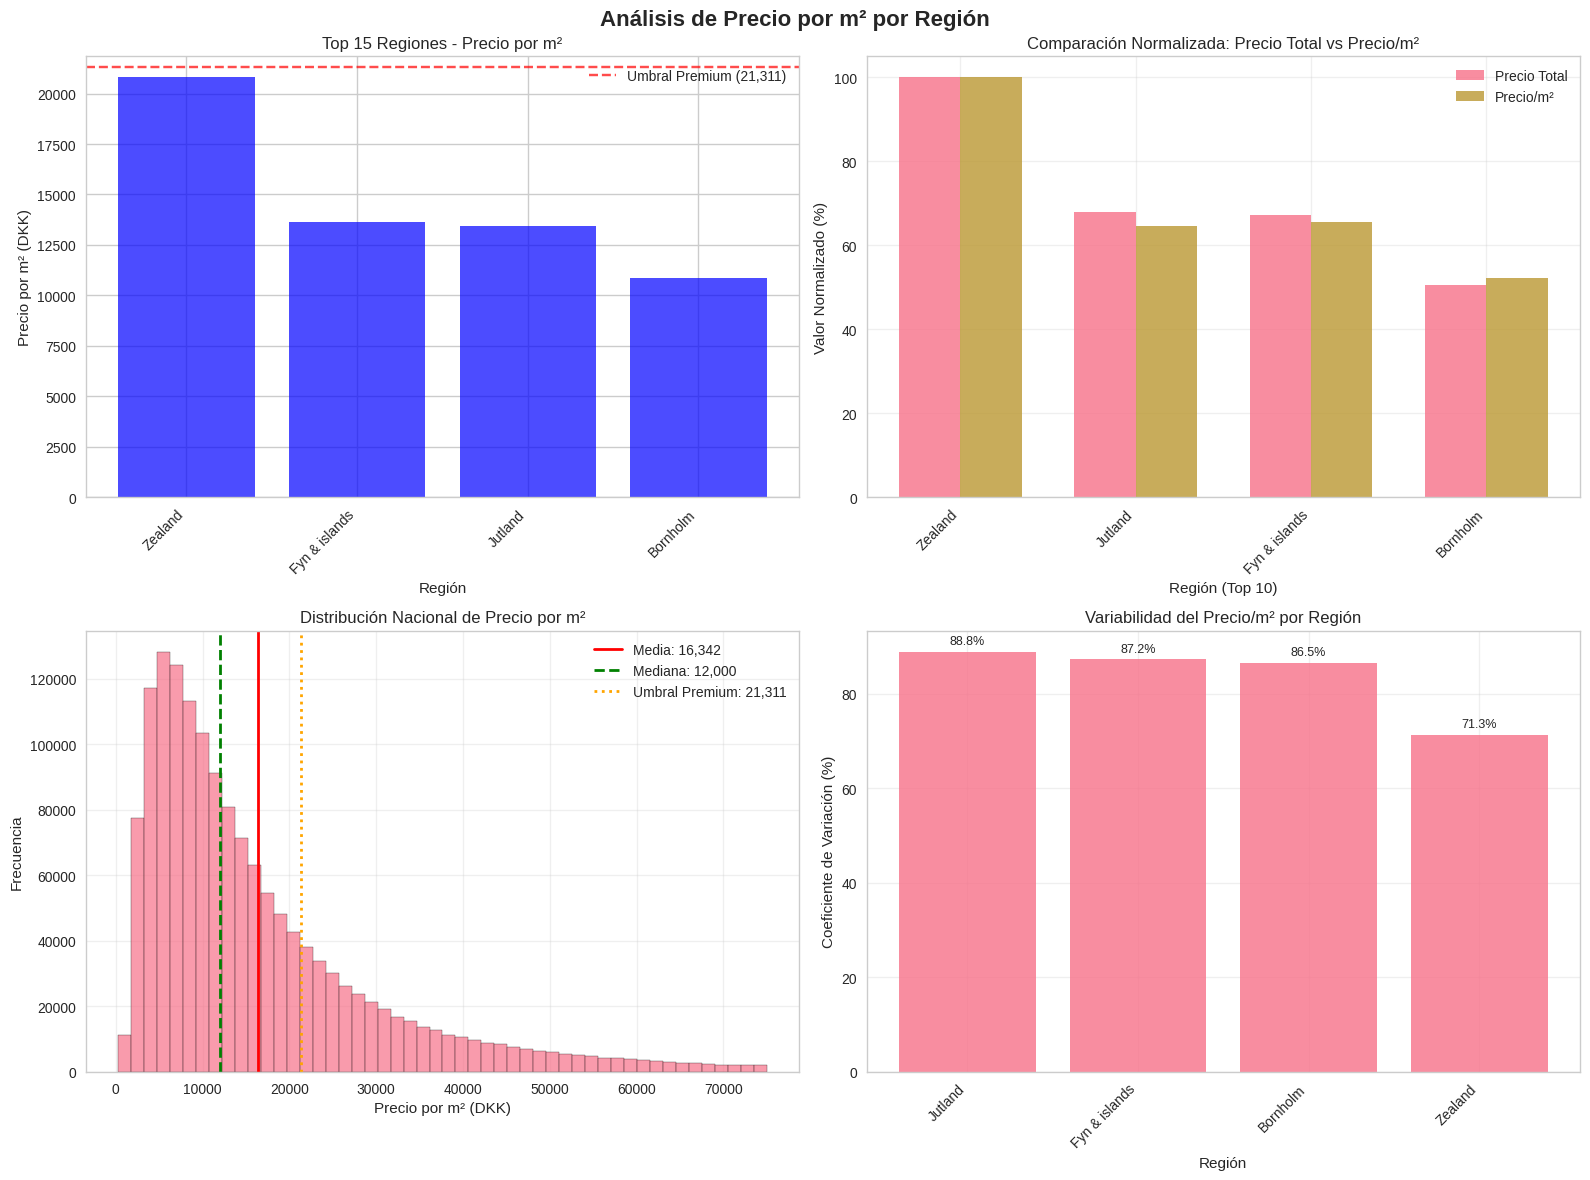


INSIGHTS CLAVE - PRECIO POR M²
Región más eficiente: Zealand
Precio/m² máximo: 20,803 DKK/m²
Región más variable: Jutland (88.8%)
Región más estable: Zealand (71.3%)
Mayor diferencia ranking: 0 posiciones


In [6]:
# Importar funciones de visualización
from src.descriptive_analysis import (
    create_sqm_price_plots,
    print_sqm_insights
)

# Crear visualizaciones y mostrar insights
create_sqm_price_plots(df_clean, sqm_stats, premium_threshold, comparison_df)
print_sqm_insights(sqm_stats, comparison_df)

### 1.3 Volumen de Transacciones por Región

Análisis del dinamismo del mercado inmobiliario a través del volumen de transacciones. Identificaremos las regiones con mayor actividad comercial y su relación con los precios.

In [7]:
# Importar funciones de análisis de volumen
from src.descriptive_analysis import (
    analyze_transaction_volume,
    print_volume_summary
)

# Ejecutar análisis de volumen
volume_stats, correlation, high_liquidity_threshold = analyze_transaction_volume(df_clean)
print_volume_summary(volume_stats, correlation, high_liquidity_threshold)

print(f"\nTOP 15 REGIONES POR VOLUMEN")
print("-" * 30)
display(volume_stats.head(15))

ANÁLISIS DE VOLUMEN DE TRANSACCIONES
Total transacciones: 1,506,591
Volumen total: 2,885,560,121,742 DKK
Correlación volumen-precio/m²: 0.547
Regiones alta liquidez: 1

CONCENTRACIÓN DE MERCADO
-------------------------
Regiones que concentran 80% del mercado: 1
Participación top 10: 100.0%

DISTRIBUCIÓN POR TIPO DE MERCADO
------------------------------
Principal: 3 regiones (75.0%)
Terciario: 1 regiones (25.0%)

TOP 15 REGIONES POR VOLUMEN
------------------------------


,Num_Transacciones,Volumen_Total_DKK,Precio_Promedio_m2,Participacion_Mercado,Participacion_Acumulada,Tipo_Mercado,Alta_Liquidez
region,,,,,,,
Jutland,755183,1223031571974,13422.0,50.125283,50.125283,Principal,True
Zealand,597090,1422148388984,20803.0,39.631858,89.757140,Principal,False
Fyn & islands,138425,221246584130,13657.0,9.187961,98.945102,Principal,False
Bornholm,15893,19133576654,10884.0,1.054898,100.000000,Terciario,False


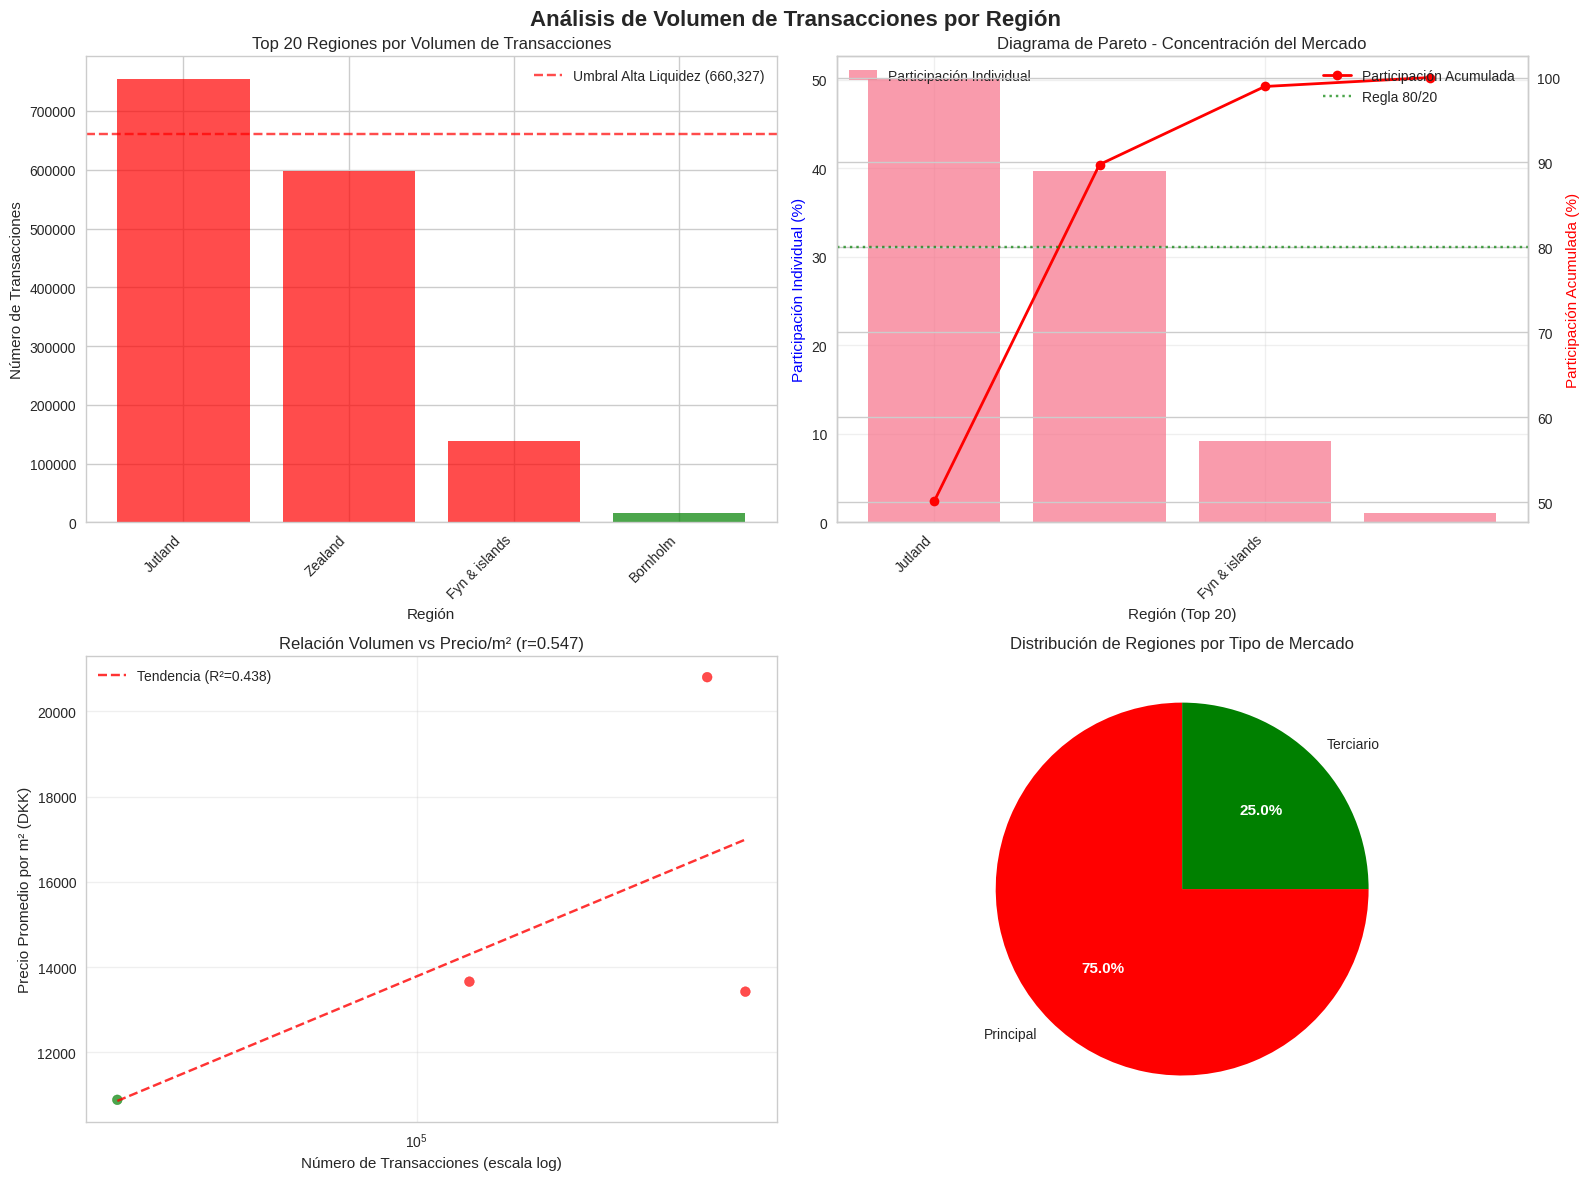


INSIGHTS CLAVE - VOLUMEN DE TRANSACCIONES
Región líder: Jutland (755,183 trans.)
Participación del líder: 50.1%
Mercados principales: 3 regiones
Concentración top 5: 100.0%
Correlación volumen-precio: Positiva (0.547)


In [8]:
# Importar funciones de visualización de volumen
from src.descriptive_analysis import (
    create_volume_plots,
    print_volume_insights
)

# Crear visualizaciones y mostrar insights
create_volume_plots(volume_stats, correlation, high_liquidity_threshold)
print_volume_insights(volume_stats, correlation)

## 2. Análisis Temporal

### 2.1 Evolución de Precios por Año

Análisis de la evolución temporal del mercado inmobiliario danés desde 1992 hasta 2024.

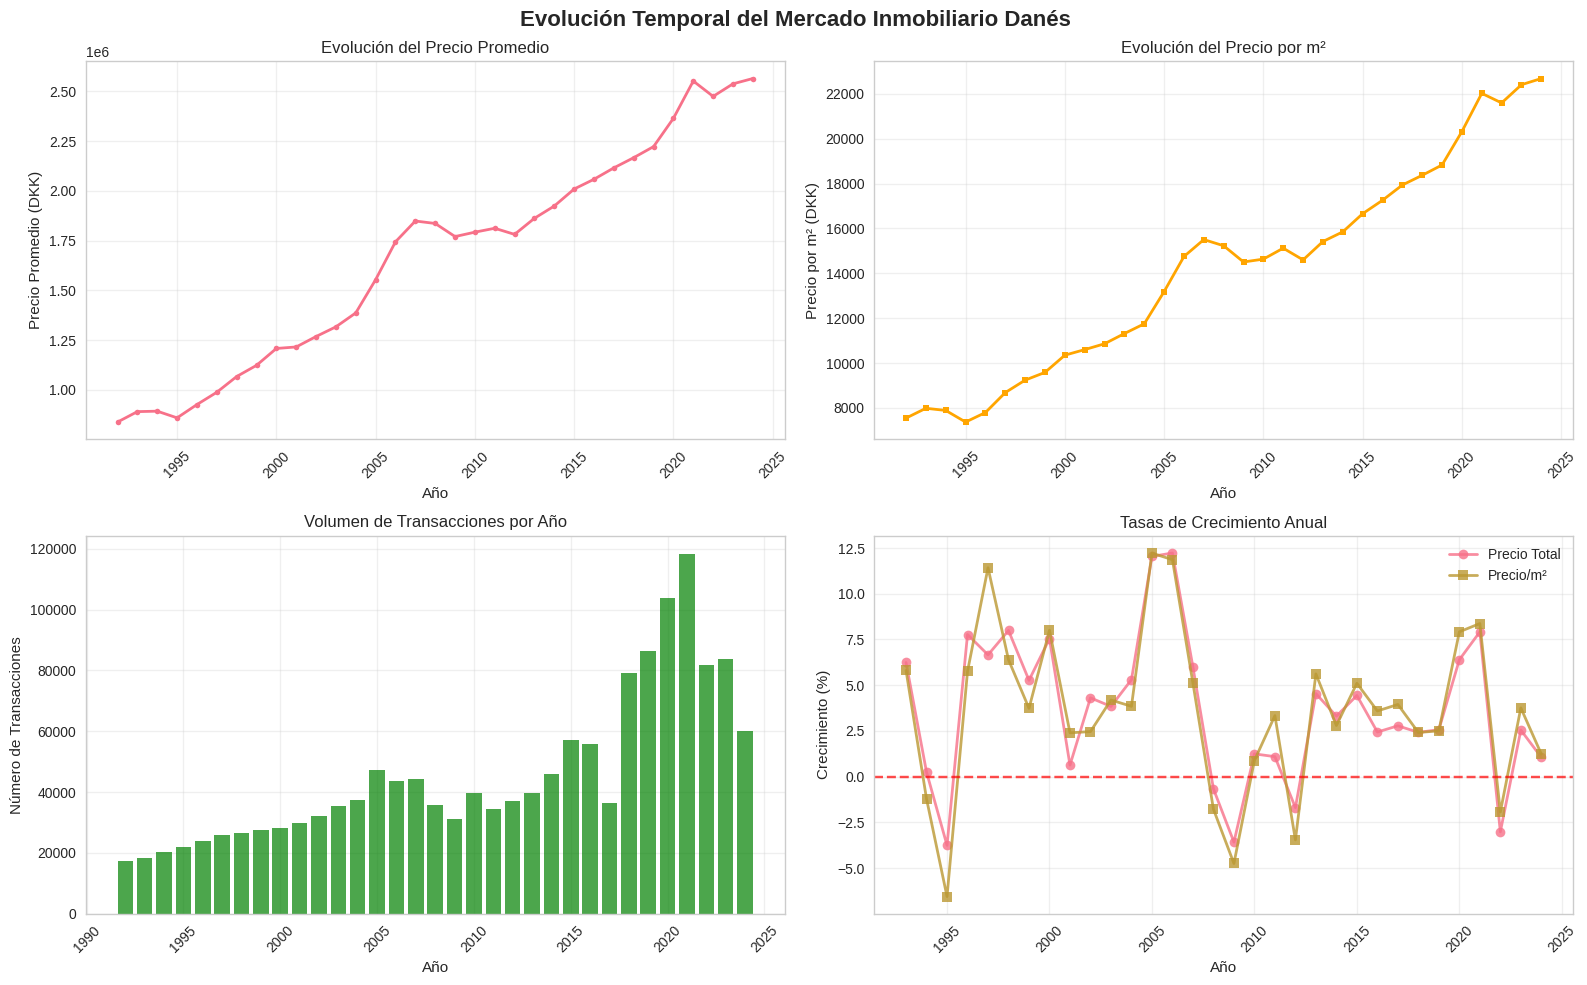

INSIGHTS TEMPORALES
Mayor crecimiento: 2006 (12.2%)
Mayor declive: 1995 (-3.8%)
Crecimiento promedio anual: 3.6%
Período analizado: 1992 - 2024

ESTADÍSTICAS ANUALES (ÚLTIMOS 10 AÑOS)
----------------------------------------


,Transacciones,Precio_Promedio,Precio_Mediana,Precio_Std,Precio_m2_Promedio,Precio_m2_Mediana,Crecimiento_Precio,Crecimiento_m2
year,,,,,,,,
2015,57214,2009160.0,1530000.0,1766041.0,16656.0,13242.0,4.438680,5.105067
2016,55890,2058150.0,1595000.0,1769288.0,17254.0,13631.0,2.438332,3.590298
2017,36344,2115366.0,1635000.0,1788191.0,17935.0,14024.0,2.779972,3.946911
2018,79101,2166570.0,1675000.0,1836794.0,18368.0,14423.0,2.420574,2.414274
2019,86434,2222180.0,1700000.0,1903253.0,18828.0,15000.0,2.566730,2.504355
2020,103847,2364256.0,1825000.0,1984536.0,20319.0,16250.0,6.393541,7.919057
2021,118342,2551422.0,1995000.0,2077377.0,22020.0,17557.0,7.916486,8.371475
2022,81800,2474367.0,1930000.0,2019003.0,21594.0,17190.0,-3.020081,-1.934605
2023,83916,2537415.0,1995000.0,2085878.0,22406.0,18129.0,2.548046,3.760304


In [9]:
# Importar funciones de análisis temporal
from src.descriptive_analysis import (
    analyze_temporal_trends,
    create_temporal_plots,
    print_temporal_insights
)

# Ejecutar análisis temporal
if 'date' in df_clean.columns:
    yearly_stats = analyze_temporal_trends(df_clean)
    create_temporal_plots(yearly_stats)
    print_temporal_insights(yearly_stats)
    
    print(f"\nESTADÍSTICAS ANUALES (ÚLTIMOS 10 AÑOS)")
    print("-" * 40)
    display(yearly_stats.tail(10))
else:
    print("Columna 'date' no encontrada. Análisis temporal no disponible.")

## Análisis Específicos Opcionales

Las siguientes celdas muestran cómo usar funciones específicas del módulo `descriptive_analysis` para análisis personalizados:

# 3. Diferencias por Tipo de Propiedad

Análisis completo de las diferencias en precios, características y comportamiento según el tipo de propiedad.

- 3.1 Comparativa de precios por house_type
- 3.2 Características físicas promedio por tipo  
- 3.3 Distribución geográfica por tipo
- 3.4 Evolución temporal por tipo de propiedad

In [10]:
# ===== ANÁLISIS POR TIPO DE PROPIEDAD =====
import importlib
import src.descriptive_analysis
importlib.reload(src.descriptive_analysis)

from src.descriptive_analysis import analyze_property_types

# Ejecutar análisis completo por tipo de propiedad
price_stats_by_type, physical_stats_by_type, regional_dist_by_type = analyze_property_types(df_clean, TARGET)

# Formatear estadísticas manualmente
price_stats_formatted = price_stats_by_type.copy()
for col in ['count', 'mean', 'median', 'std', 'min', 'max']:
    if col == 'count':
        price_stats_formatted[col] = price_stats_formatted[col].apply(lambda x: f"{x:,.0f}")
    else:
        price_stats_formatted[col] = price_stats_formatted[col].apply(lambda x: f"{x:,.0f} DKK")
price_stats_formatted['cv'] = price_stats_formatted['cv'].apply(lambda x: f"{x:.1f}%")

display(price_stats_formatted)

# Mostrar características físicas
print("\n🏗️ Características físicas por tipo:")
display(physical_stats_by_type)

# Mostrar distribución regional
print("🔝 Top 3 regiones por concentración de cada tipo:")
for house_type in regional_dist_by_type.columns:
    top_regions_for_type = regional_dist_by_type[house_type].nlargest(3)
    print(f"\n{house_type}:")
    for region, pct in top_regions_for_type.items():
        print(f"  • {region}: {pct:.1f}%")

🏠 ANÁLISIS POR TIPO DE PROPIEDAD

📊 3.1 Estadísticas de precios por tipo de propiedad:

🏗️ 3.2 Características físicas por tipo:

🌍 3.3 Distribución regional por tipo de propiedad:


,count,mean,median,std,min,max,cv
house_type,,,,,,,
Apartment,"293,435","2,406,994 DKK","1,925,000 DKK","1,841,846 DKK","250,325 DKK","46,000,000 DKK",76.5%
Farm,"73,904","2,731,946 DKK","1,700,000 DKK","3,127,039 DKK","250,057 DKK","46,800,000 DKK",114.5%
Townhouse,"155,301","2,114,122 DKK","1,700,000 DKK","1,592,611 DKK","250,034 DKK","37,800,000 DKK",75.3%
Villa,"816,161","1,771,535 DKK","1,295,000 DKK","1,637,110 DKK","250,010 DKK","45,500,000 DKK",92.4%
Summerhouse,"167,790","1,210,914 DKK","950,924 DKK","1,006,275 DKK","250,037 DKK","45,955,000 DKK",83.1%



🏗️ Características físicas por tipo:


,sqm_mean,sqm_median,sqm_std,no_rooms_mean,no_rooms_median,no_rooms_std,sqm_price_mean,sqm_price_median,sqm_price_std
house_type,,,,,,,,,
Apartment,86.44,79.0,41.12,2.87,3.0,1.12,28442.19,25237.11,17092.89
Farm,197.10,187.0,72.51,6.09,6.0,2.08,13845.66,9405.94,13172.39
Summerhouse,83.35,76.0,41.77,3.78,4.0,1.11,15064.12,12900.00,9701.31
Townhouse,108.56,106.0,30.91,3.88,4.0,1.10,19463.95,16473.91,13031.31
Villa,151.90,146.0,48.08,4.97,5.0,1.46,11886.33,9048.48,9744.72


🔝 Top 3 regiones por concentración de cada tipo:

Apartment:
  • Zealand: 52.3%
  • Jutland: 40.5%
  • Fyn & islands: 7.0%

Farm:
  • Jutland: 66.5%
  • Zealand: 21.6%
  • Fyn & islands: 10.3%

Summerhouse:
  • Jutland: 49.1%
  • Zealand: 43.3%
  • Fyn & islands: 5.6%

Townhouse:
  • Zealand: 48.0%
  • Jutland: 38.8%
  • Fyn & islands: 11.4%

Villa:
  • Jutland: 54.5%
  • Zealand: 34.4%
  • Fyn & islands: 10.2%


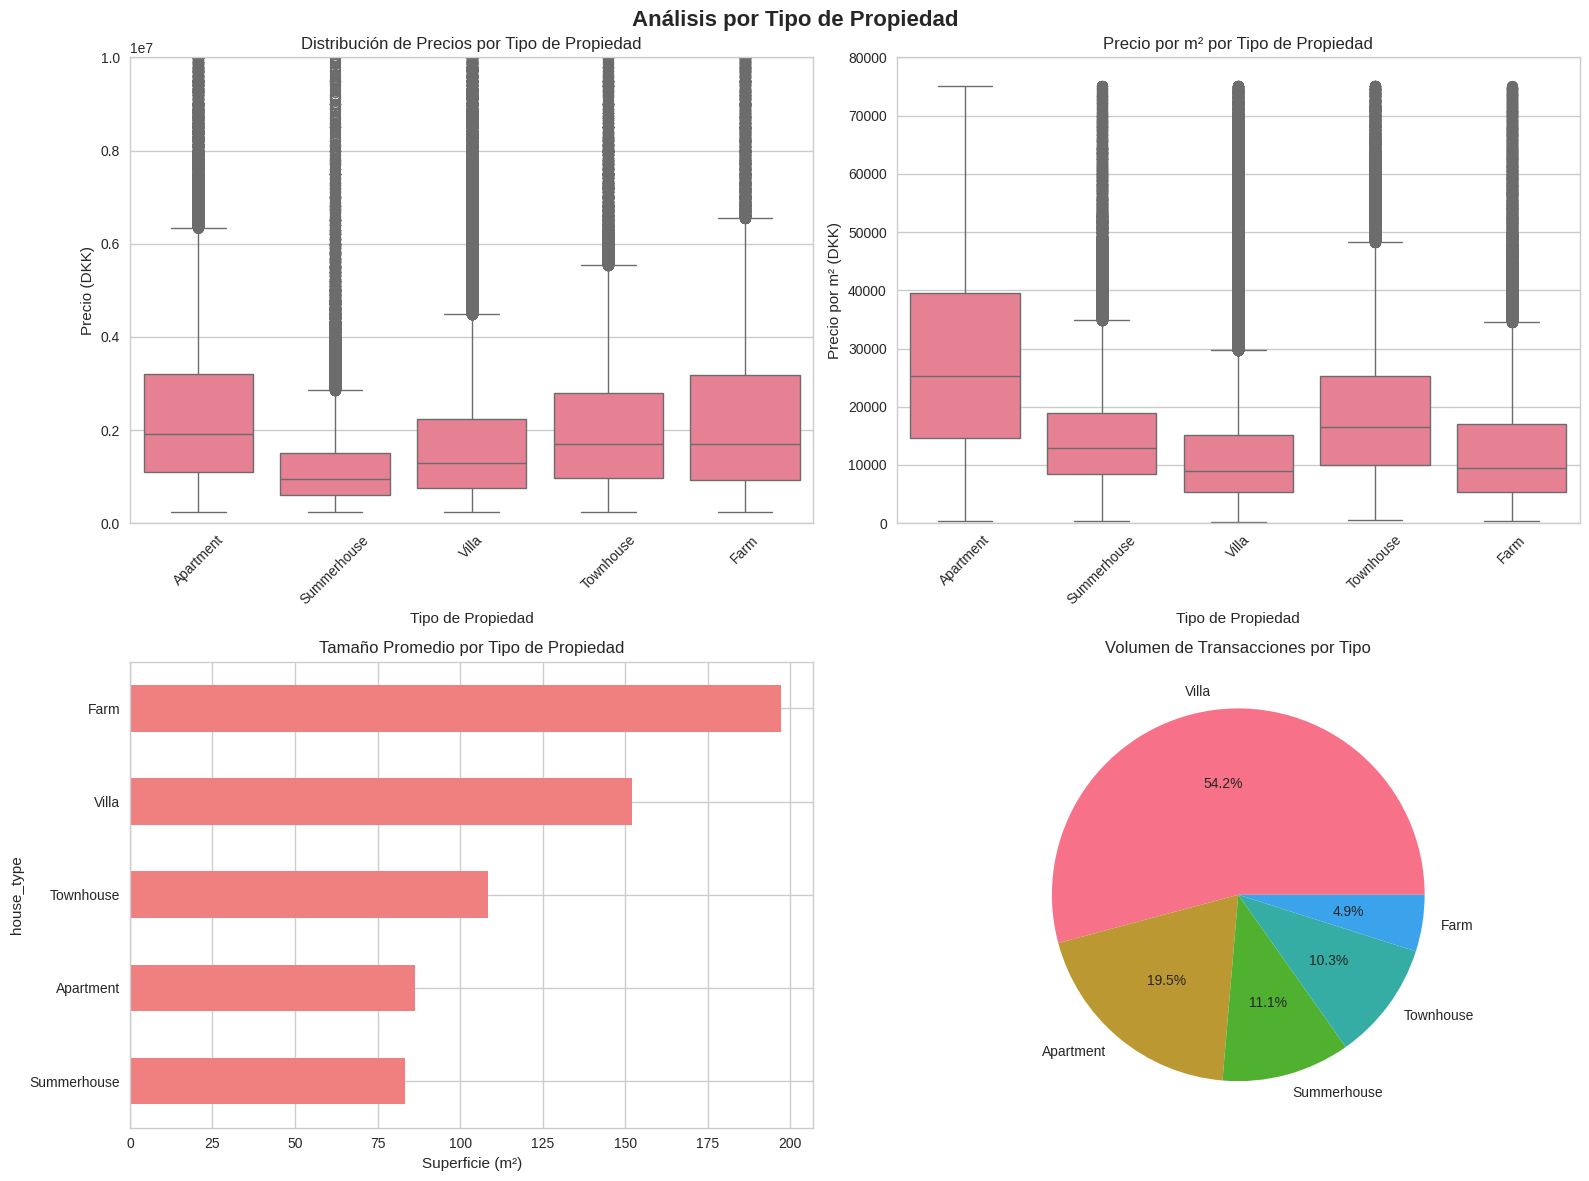


3.4 Tests de significancia estadística entre tipos de propiedad:
ANOVA - Diferencias de precio entre tipos de propiedad:
F-estadístico: 19086.99
p-valor: 0.00e+00
Interpretación: Hay diferencias significativas

3.5 Correlaciones precio vs características por tipo:
Apartment:
  Correlación precio-tamaño: 0.418
  Correlación precio-habitaciones: 0.368
Summerhouse:
  Correlación precio-tamaño: 0.355
  Correlación precio-habitaciones: 0.247
Villa:
  Correlación precio-tamaño: 0.277
  Correlación precio-habitaciones: 0.208
Townhouse:
  Correlación precio-tamaño: 0.374
  Correlación precio-habitaciones: 0.284
Farm:
  Correlación precio-tamaño: 0.351
  Correlación precio-habitaciones: 0.272

📊 Resultados del análisis estadístico guardados en 'property_significance'
✅ F-estadístico ANOVA: 19086.99
✅ P-valor: 0.00e+00
✅ Correlaciones por tipo disponibles en el diccionario


In [11]:
# ===== VISUALIZACIONES Y ANÁLISIS ESTADÍSTICO =====
from src.descriptive_analysis import create_property_type_plots, analyze_property_type_significance

# Crear visualizaciones por tipo de propiedad
create_property_type_plots(df_clean, TARGET)

# Análisis de significancia estadística
property_significance = analyze_property_type_significance(df_clean, TARGET)

print("\n📊 Resultados del análisis estadístico guardados en 'property_significance'")
print(f"✅ F-estadístico ANOVA: {property_significance['anova_f_stat']:.2f}")
print(f"✅ P-valor: {property_significance['anova_p_value']:.2e}")
print(f"✅ Correlaciones por tipo disponibles en el diccionario")

# 4. Análisis del Comportamiento de Mercado

Análisis detallado del comportamiento del mercado inmobiliario danés, incluyendo canales de venta, patrones de negociación y estacionalidad.

- 4.1 Análisis de sales_type (subasta vs venta regular)
- 4.2 Variación precio oferta vs compra  
- 4.3 Tiempo en mercado (análisis quarter)
- 4.4 Patrones estacionales

In [12]:
# ===== ANÁLISIS DEL COMPORTAMIENTO DE MERCADO =====
from src.descriptive_analysis import analyze_market_behavior

# Ejecutar análisis completo del comportamiento de mercado
market_behavior_results = analyze_market_behavior(df_clean, TARGET)

# Mostrar resultados de sales_type si está disponible
if market_behavior_results['sales_analysis'] is not None:
    print("\n📊 Análisis por tipo de venta:")
    # Formatear para mostrar
    sales_formatted = market_behavior_results['sales_analysis'].copy()
    for col in sales_formatted.columns:
        if 'count' in col:
            sales_formatted[col] = sales_formatted[col].apply(lambda x: f"{x:,.0f}")
        elif 'DKK' not in str(sales_formatted[col].iloc[0]):
            sales_formatted[col] = sales_formatted[col].apply(lambda x: f"{x:,.0f} DKK")
    
    display(sales_formatted)

# Mostrar análisis de cambio oferta-compra si está disponible
if market_behavior_results['change_analysis'] is not None:
    change_stats = market_behavior_results['change_analysis']['stats']
    print(f"\n💰 Análisis de variación precio oferta vs compra:")
    print(f"Media: {change_stats['mean']:.2f}%")
    print(f"Mediana: {change_stats['50%']:.2f}%")
    print(f"Desv. Std: {change_stats['std']:.2f}%")
    print(f"Rango: {change_stats['min']:.2f}% a {change_stats['max']:.2f}%")

# Mostrar análisis trimestral si está disponible
if market_behavior_results.get('quarterly_analysis') is not None:
    print("\n📅 Estadísticas por trimestre:")
    display(market_behavior_results['quarterly_analysis'])
    
    print("\n📈 Análisis por mes:")
    display(market_behavior_results['monthly_analysis'])

print(f"\n📊 Resultados completos guardados en 'market_behavior_results'")

=== ANÁLISIS DEL COMPORTAMIENTO DE MERCADO ===
4.1 Columnas disponibles relacionadas con mercado:
Columnas encontradas: ['quarter', 'house_type', 'sales_type', '%_change_between_offer_and_purchase']

4.1 Análisis por tipo de venta (sales_type):

4.2 Análisis de variación precio oferta vs compra (%_change_between_offer_and_purchase):
Distribución de cambios:
  Sin cambio ±1%: 973,567 (64.6%)
  Descuento >5%: 275,583 (18.3%)
  Descuento 1-5%: 230,177 (15.3%)
  Premium 1-5%: 17,074 (1.1%)
  Premium >5%: 10,190 (0.7%)

4.4 Análisis estacional usando la fecha:
Estadísticas por trimestre (derivado de fecha):

📊 Análisis por tipo de venta:


,purchase_price_count,purchase_price_mean,purchase_price_median,purchase_price_std,sqm_price_mean,sqm_price_median
sales_type,,,,,,
-,19,"1,411,172 DKK","1,140,000 DKK","879,951 DKK","12,585 DKK","13,087 DKK"
auction,"17,102","1,390,047 DKK","845,000 DKK","1,606,859 DKK","13,520 DKK","7,333 DKK"
family_sale,"121,116","1,493,534 DKK","955,303 DKK","1,815,361 DKK","12,720 DKK","9,000 DKK"
other_sale,"36,637","1,778,170 DKK","1,050,000 DKK","2,074,054 DKK","16,109 DKK","8,896 DKK"
regular_sale,"1,331,717","1,964,173 DKK","1,465,000 DKK","1,747,075 DKK","16,714 DKK","12,485 DKK"



💰 Análisis de variación precio oferta vs compra:
Media: -2.08%
Mediana: 0.00%
Desv. Std: 4.81%
Rango: -49.00% a 49.00%

📅 Estadísticas por trimestre:


,purchase_price_count,purchase_price_mean,purchase_price_median,sqm_price_mean,sqm_price_median
quarter_from_date,,,,,
1,356565,1944098.0,1402500.0,16469.0,12043.0
2,412866,1916026.0,1400000.0,16368.0,12077.0
3,381597,1893702.0,1395000.0,16176.0,12000.0
4,355563,1908718.0,1385000.0,16363.0,11907.0



📈 Análisis por mes:


,count,mean,median
month,,,
1,110218,1975422.0,1425000.0
2,113755,1941374.0,1410000.0
3,132592,1920398.0,1400000.0
4,126873,1928974.0,1400000.0
5,138042,1912685.0,1402575.0
6,147951,1908040.0,1400000.0
7,121578,1915757.0,1420000.0
8,126710,1863422.0,1364998.0
9,133309,1902370.0,1395000.0



📊 Resultados completos guardados en 'market_behavior_results'


---

## 🚀 Análisis Completo con Una Sola Función

**Opcional**: También puedes ejecutar todo el análisis de una vez usando la función principal:

In [13]:
# ===== FUNCIÓN PRINCIPAL COMPLETA (OPCIONAL) =====
# Descomenta las siguientes líneas para ejecutar todo el análisis de una vez:

# from src.descriptive_analysis import run_complete_descriptive_analysis

# # Ejecutar análisis completo con visualizaciones
# complete_results = run_complete_descriptive_analysis(
#     df_clean, 
#     target=TARGET, 
#     include_visualizations=True
# )

# # Los resultados incluyen:
# # - complete_results['regional_stats']: Análisis regional

# # - complete_results['property_analysis']: Análisis por tipo de propiedad  
# # - complete_results['market_behavior']: Comportamiento de mercado
# # - complete_results['market_segmentation']: Segmentación de mercado
# # - complete_results['seasonal_patterns']: Patrones estacionales
# # Y muchos más...

print("💡 Función principal disponible para análisis completo automatizado")
print("📖 Descomenta el código arriba para usarla")

💡 Función principal disponible para análisis completo automatizado
📖 Descomenta el código arriba para usarla


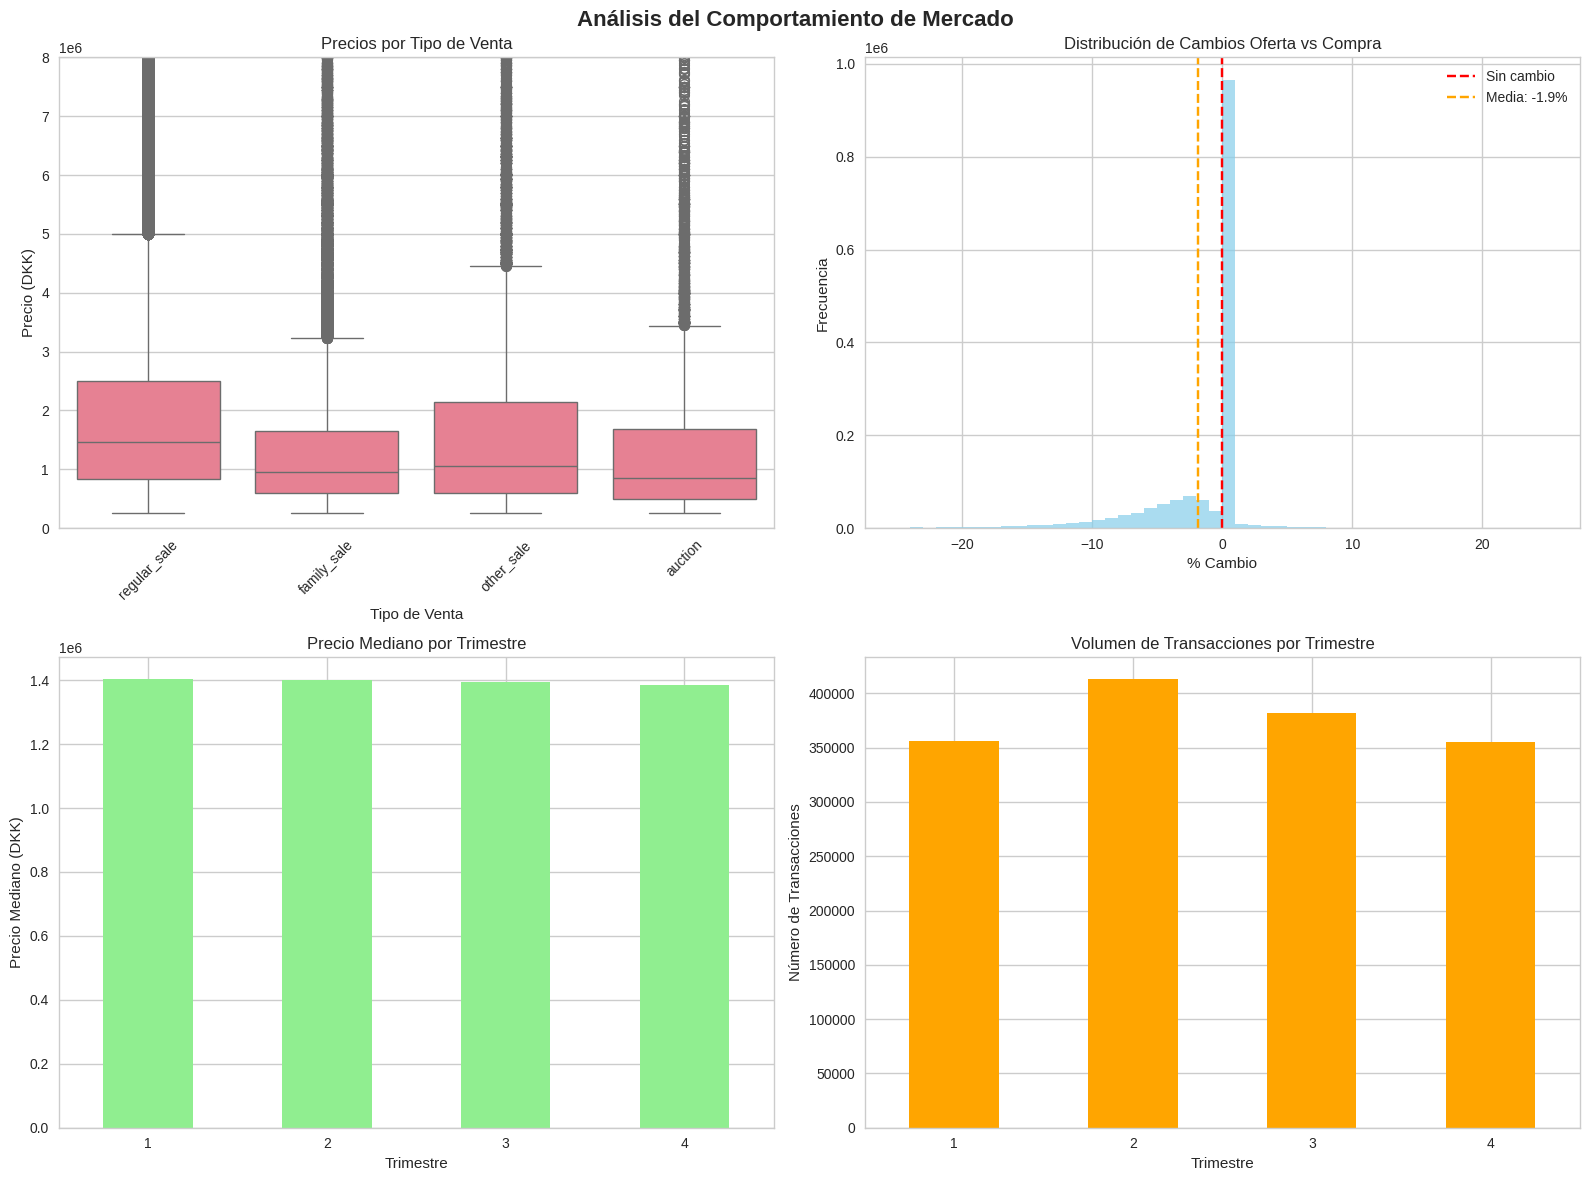


4.5 Análisis de estacionalidad mensual:


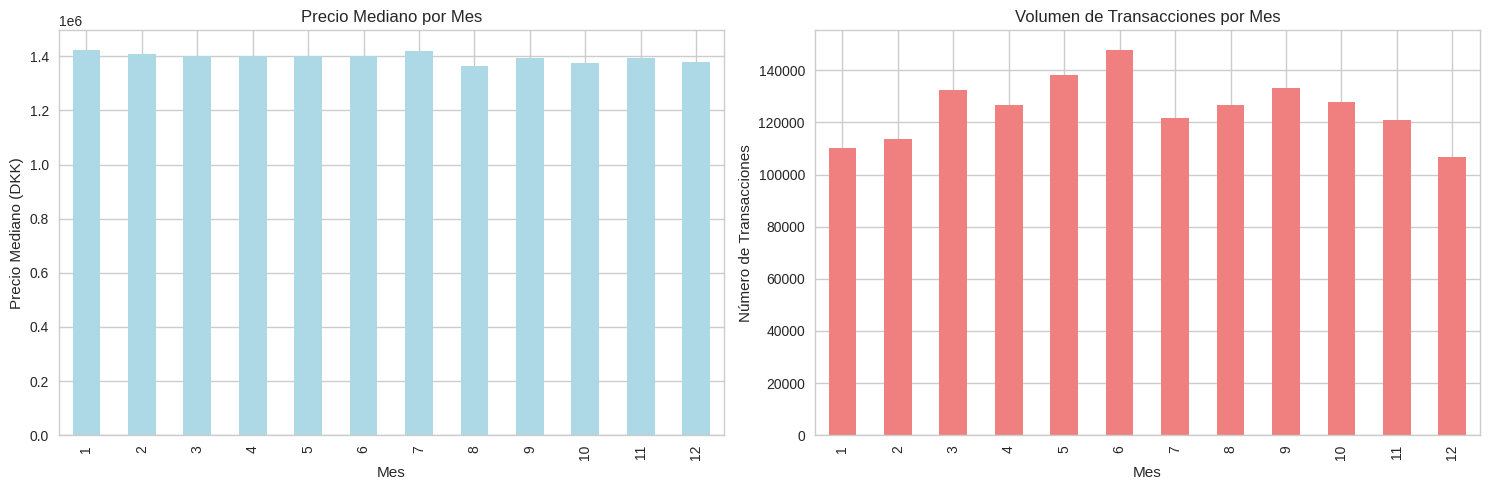

Patrones estacionales identificados:
- Mes con precios más altos: 1 (1,425,000 DKK)
- Mes con precios más bajos: 8 (1,364,998 DKK)
- Mes con más transacciones: 6 (147,951 transacciones)
- Mes con menos transacciones: 12 (106,687 transacciones)

🌤️ INSIGHTS ESTACIONALES ADICIONALES:
📊 Variación estacional de precios: 4.3%
📈 Variación estacional de volumen: 32.9%
✅ Baja variación estacional en precios - mercado estable
⚠️  Alta variación estacional en volumen - demanda muy estacional

✅ Resultados estacionales guardados en 'seasonal_results'


In [14]:
# ===== VISUALIZACIONES DEL COMPORTAMIENTO DE MERCADO =====

# Crear visualizaciones del comportamiento de mercado
create_market_behavior_plots(df_clean, market_behavior_results, TARGET)

# Análisis estacional detallado
seasonal_results = analyze_seasonal_patterns(df_clean, TARGET)

if seasonal_results:
    print(f"\n🌤️ INSIGHTS ESTACIONALES ADICIONALES:")
    print("=" * 40)
    
    # Calcular variación estacional
    monthly_prices = seasonal_results['monthly_prices']
    price_variation = (monthly_prices.max() - monthly_prices.min()) / monthly_prices.mean() * 100
    
    monthly_volume = seasonal_results['monthly_volume']
    volume_variation = (monthly_volume.max() - monthly_volume.min()) / monthly_volume.mean() * 100
    
    print(f"📊 Variación estacional de precios: {price_variation:.1f}%")
    print(f"📈 Variación estacional de volumen: {volume_variation:.1f}%")
    
    # Identificar tendencias
    if price_variation > 10:
        print("⚠️  Alta variación estacional en precios - mercado sensible a estacionalidad")
    else:
        print("✅ Baja variación estacional en precios - mercado estable")
        
    if volume_variation > 30:
        print("⚠️  Alta variación estacional en volumen - demanda muy estacional")
    else:
        print("✅ Variación moderada en volumen")

print(f"\n✅ Resultados estacionales guardados en 'seasonal_results'")

# 5. Segmentación de Mercado

Análisis de diferentes segmentos del mercado inmobiliario danés para identificar patrones y oportunidades específicas.

- 5.1 Segmento premium vs económico
- 5.2 Propiedades nuevas vs antiguas  
- 5.3 Mercado urbano vs rural
- 5.4 Análisis de nicho (casas de verano, granjas)

In [15]:
# ===== SEGMENTACIÓN DE MERCADO =====
from src.descriptive_analysis import analyze_market_segmentation

# Ejecutar análisis completo de segmentación
market_segmentation_results = analyze_market_segmentation(df_clean, TARGET)

# Mostrar estadísticas de segmentación por precio
if 'price_segmentation' in market_segmentation_results:
    segment_stats = market_segmentation_results['price_segmentation']['segment_stats']
    
    # Formatear manualmente
    segment_formatted = segment_stats.copy()
    for col in segment_formatted.columns:
        if 'count' in col:
            segment_formatted[col] = segment_formatted[col].apply(lambda x: f"{x:,.0f}")
        elif any(price_col in col for price_col in ['purchase_price', 'sqm_price']):
            segment_formatted[col] = segment_formatted[col].apply(lambda x: f"{x:,.0f} DKK")
        elif any(metric in col for metric in ['sqm_', 'no_rooms']):
            segment_formatted[col] = segment_formatted[col].apply(lambda x: f"{x:.1f}")
    
    print("\n💰 SEGMENTACIÓN POR PRECIO:")
    display(segment_formatted)

# Mostrar estadísticas de segmentación por antigüedad
if market_segmentation_results.get('age_segmentation') is not None:
    age_stats = market_segmentation_results['age_segmentation']['age_stats']
    
    # Formatear manualmente
    age_formatted = age_stats.copy()
    for col in age_formatted.columns:
        if 'count' in col:
            age_formatted[col] = age_formatted[col].apply(lambda x: f"{x:,.0f}")
        elif any(price_col in col for price_col in ['purchase_price', 'sqm_price']):
            age_formatted[col] = age_formatted[col].apply(lambda x: f"{x:,.0f} DKK")
        elif 'property_age' in col:
            age_formatted[col] = age_formatted[col].apply(lambda x: f"{x:.0f} años")
    
    print("\n🏗️ SEGMENTACIÓN POR ANTIGÜEDAD:")
    display(age_formatted)

# Mostrar estadísticas urbano vs rural
if 'urban_rural' in market_segmentation_results:
    urban_rural_stats = market_segmentation_results['urban_rural']['stats']
    
    # Formatear manualmente
    urban_rural_formatted = urban_rural_stats.copy()
    for col in urban_rural_formatted.columns:
        if 'count' in col:
            urban_rural_formatted[col] = urban_rural_formatted[col].apply(lambda x: f"{x:,.0f}")
        elif any(price_col in col for price_col in ['purchase_price', 'sqm_price']):
            urban_rural_formatted[col] = urban_rural_formatted[col].apply(lambda x: f"{x:,.0f} DKK")
        elif 'sqm' in col:
            urban_rural_formatted[col] = urban_rural_formatted[col].apply(lambda x: f"{x:.0f} m²")
    
    print("\n🏙️ SEGMENTACIÓN URBANO VS RURAL:")
    display(urban_rural_formatted)

print(f"\n📊 Resultados completos guardados en 'market_segmentation_results'")

=== SEGMENTACIÓN DE MERCADO ===

5.1 Segmentación premium vs económico:


Umbrales de segmentación:
- Q25 (Económico): 800,000 DKK
- Q75 (Alto): 2,450,000 DKK
- Q90 (Premium): 3,900,000 DKK

5.2 Segmentación por antigüedad de la propiedad:

5.3 Análisis de mercados de nicho:

--- Análisis de Farm ---
Número de propiedades: 73,904
Precio promedio: 2,731,946 DKK
Precio mediano: 1,700,000 DKK
Tamaño promedio: 197 m²
Precio/m² promedio: 13,846 DKK/m²
Top 5 regiones:
  Jutland: 49151 (66.5%)
  Zealand: 15961 (21.6%)
  Fyn & islands: 7646 (10.3%)
  Bornholm: 1146 (1.6%)

--- Análisis de Summerhouse ---
Número de propiedades: 167,790
Precio promedio: 1,210,914 DKK
Precio mediano: 950,924 DKK
Tamaño promedio: 83 m²
Precio/m² promedio: 15,064 DKK/m²
Top 5 regiones:
  Jutland: 82426 (49.1%)
  Zealand: 72679 (43.3%)
  Fyn & islands: 9414 (5.6%)
  Bornholm: 3271 (1.9%)
Estacionalidad de Summerhouse:
Meses pico de transacciones:
  Mes 6: 18287 transacciones
  Mes 5: 16948 transacciones
  Mes 8: 15442 transacciones

5.4 Aproximación de segmentación urbano vs rural:
Clasif

,purchase_price_count,purchase_price_mean,purchase_price_median,purchase_price_min,purchase_price_max,sqm_mean,sqm_median,no_rooms_mean,no_rooms_median,sqm_price_mean,sqm_price_median
price_segment,,,,,,,,,,,
Económico,"386,404","548,924 DKK","552,500 DKK","250,010 DKK","800,000 DKK",118.0,112.0,4.0,4.0,"5,682 DKK","4,881 DKK"
Medio,"745,959","1,477,192 DKK","1,400,000 DKK","800,001 DKK","2,450,000 DKK",127.0,122.0,4.0,4.0,"13,847 DKK","11,905 DKK"
Alto,"226,412","3,064,995 DKK","3,000,000 DKK","2,450,001 DKK","3,900,000 DKK",136.0,130.0,4.0,4.0,"26,539 DKK","23,438 DKK"
Premium,"147,816","5,936,956 DKK","5,150,000 DKK","3,900,001 DKK","46,800,000 DKK",158.0,146.0,5.0,5.0,"41,182 DKK","39,080 DKK"



🏗️ SEGMENTACIÓN POR ANTIGÜEDAD:


,purchase_price_count,purchase_price_mean,purchase_price_median,sqm_price_mean,sqm_price_median,property_age_mean,property_age_median
age_category,,,,,,,
Nueva (0-10 años),"94,786","2,678,015 DKK","2,300,000 DKK","21,232 DKK","18,563 DKK",5 años,5 años
Moderna (11-25 años),"142,981","2,248,990 DKK","1,975,000 DKK","17,747 DKK","15,826 DKK",18 años,18 años
Madura (26-50 años),"279,351","1,644,376 DKK","1,300,000 DKK","13,916 DKK","11,379 DKK",42 años,44 años
Antigua (51-100 años),"675,332","1,763,260 DKK","1,300,000 DKK","15,731 DKK","11,593 DKK",69 años,64 años
Histórica (>100 años),"298,463","2,098,480 DKK","1,375,000 DKK","17,759 DKK","10,714 DKK",129 años,124 años



🏙️ SEGMENTACIÓN URBANO VS RURAL:


,purchase_price_count,purchase_price_mean,purchase_price_median,sqm_price_mean,sqm_price_median,sqm_mean,sqm_median
area_type,,,,,,,
Rural,"909,501","1,609,027 DKK","1,200,000 DKK","13,413 DKK","9,821 DKK",134 m²,128 m²
Urbano,"597,090","2,381,799 DKK","1,844,002 DKK","20,803 DKK","16,990 DKK",122 m²,116 m²



📊 Resultados completos guardados en 'market_segmentation_results'


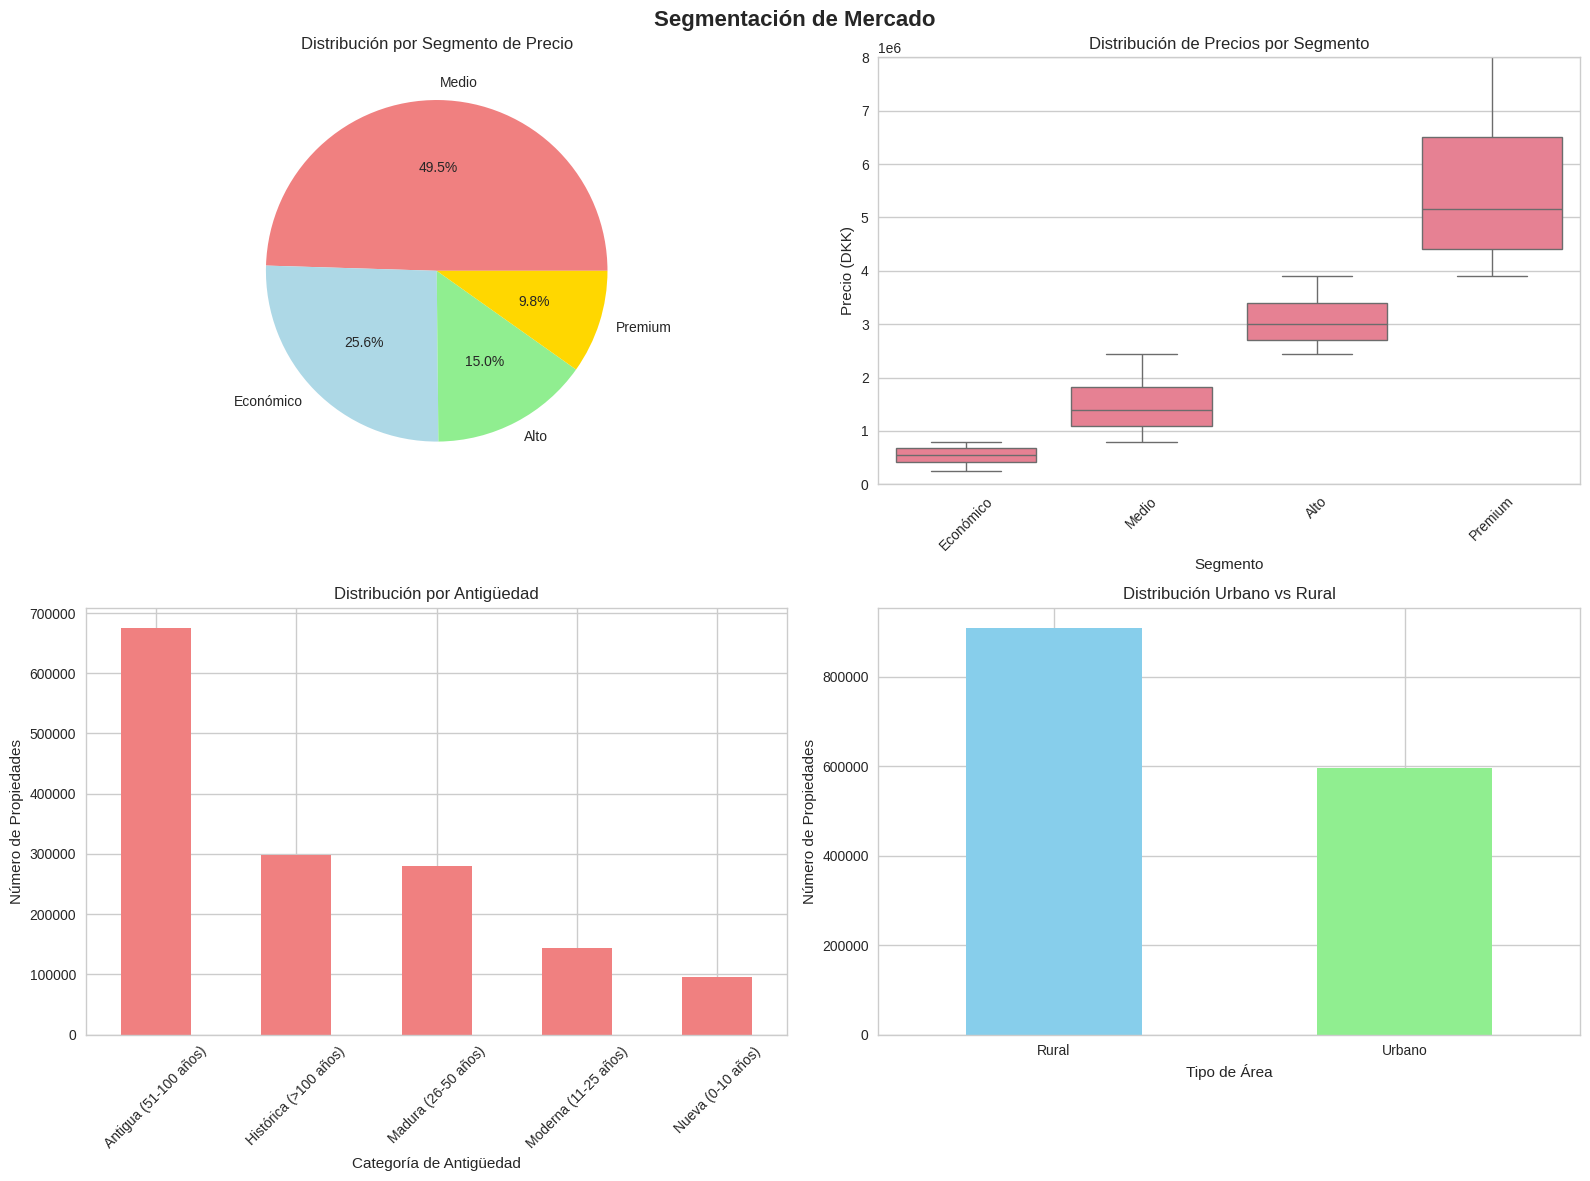


5.5 Análisis visual de mercados de nicho:


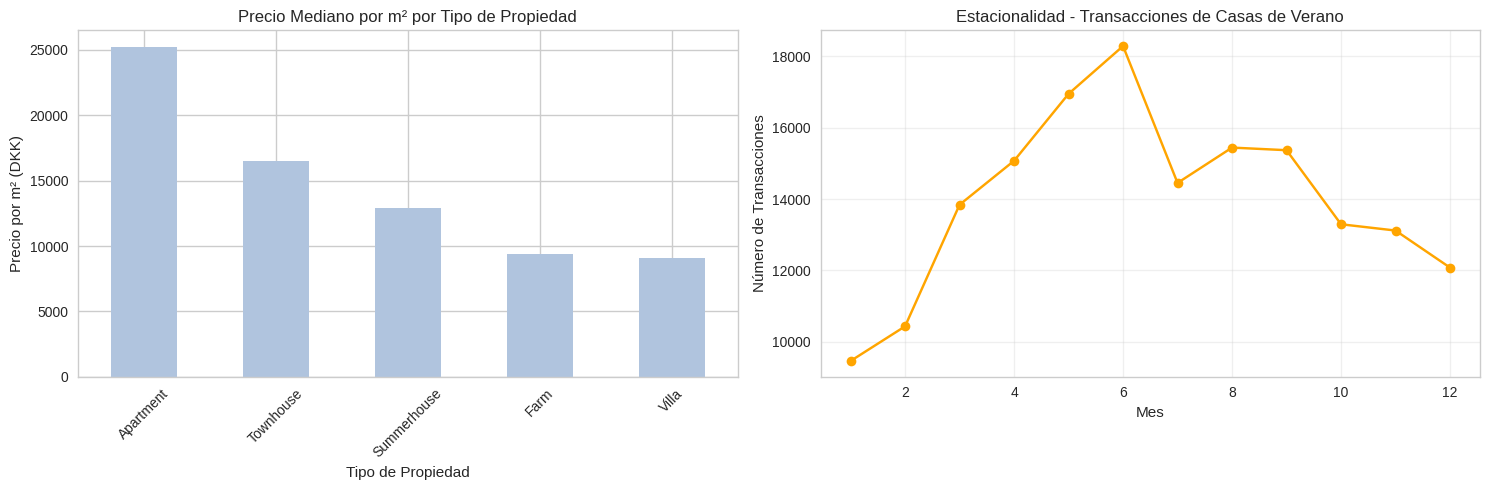


5.6 Resumen de insights de segmentación:
SEGMENTACIÓN POR PRECIO:
- Económico: 386,404 propiedades (25.6%)
- Medio: 745,959 propiedades (49.5%)
- Alto: 226,412 propiedades (15.0%)
- Premium: 147,816 propiedades (9.8%)

SEGMENTACIÓN URBANO/RURAL:
- Premium urbano: 1.5x más caro que rural
- Diferencia precio/m²: 7,170 DKK/m²

MERCADOS DE NICHO:
- Farm: 1.5x el tamaño promedio, 1.15x el precio mediano
- Summerhouse: 0.6x el tamaño promedio, 0.65x el precio mediano

🎯 OPORTUNIDADES DE MERCADO IDENTIFICADAS:
🔍 Segmento menos saturado: Premium (147,816 propiedades)
📈 Segmento dominante: Medio (745,959 propiedades)

🏠 NICHOS DE MERCADO:
- Farm: 4.91% del mercado total
- Summerhouse: 11.14% del mercado total

✅ Análisis de segmentación completado exitosamente


In [16]:
# ===== VISUALIZACIONES DE SEGMENTACIÓN DE MERCADO =====

# Crear visualizaciones principales de segmentación
create_market_segmentation_plots(df_clean, market_segmentation_results, TARGET)

# Crear visualizaciones específicas de nichos
niche_analysis = market_segmentation_results.get('niche_analysis', {})
create_niche_analysis_plots(df_clean, niche_analysis, TARGET)

# Imprimir insights detallados de segmentación
print_segmentation_insights(market_segmentation_results, df_clean)

# Análisis adicional de oportunidades de mercado
print(f"\n🎯 OPORTUNIDADES DE MERCADO IDENTIFICADAS:")
print("=" * 50)

# Oportunidades por segmento de precio
if 'price_segmentation' in market_segmentation_results:
    df_with_segments = market_segmentation_results['price_segmentation']['df_with_segments']
    
    # Segmento con mayor crecimiento potencial
    segment_sizes = df_with_segments['price_segment'].value_counts()
    smallest_segment = segment_sizes.idxmin()
    largest_segment = segment_sizes.idxmax()
    
    print(f"🔍 Segmento menos saturado: {smallest_segment} ({segment_sizes[smallest_segment]:,} propiedades)")
    print(f"📈 Segmento dominante: {largest_segment} ({segment_sizes[largest_segment]:,} propiedades)")

# Oportunidades por nicho
if niche_analysis:
    print(f"\n🏠 NICHOS DE MERCADO:")
    for niche_name, niche_data in niche_analysis.items():
        if 'count' in niche_data:
            market_share = niche_data['count'] / len(df_clean) * 100
            print(f"- {niche_name}: {market_share:.2f}% del mercado total")

print(f"\n✅ Análisis de segmentación completado exitosamente")

In [17]:
# # Ejecutar análisis completo usando el módulo
# results = run_complete_descriptive_analysis(df_clean)

# # Generar y mostrar reporte resumen
# summary_report = generate_summary_report(results)
# print(summary_report)

# # Exportar resultados a CSV (opcional)
# # export_results_to_csv(results, output_dir='results/tablas/')

# print(f"\nResultados disponibles en la variable 'results':")
# print(f"- regional_stats: Estadísticas regionales")
# print(f"- sqm_stats: Estadísticas de precio por m²")
# print(f"- volume_stats: Estadísticas de volumen")
# print(f"- yearly_stats: Estadísticas temporales")
# print(f"- comparison_df: Comparación de rankings")
# print(f"- premium_threshold: Umbral de mercado premium")
# print(f"- correlation: Correlación volumen-precio")
# print(f"- cv_data: Coeficientes de variación")

## Ejecución Completa Extendida (Opcional)

Para ejecutar todo el análisis extendido de una vez, incluyendo todos los nuevos análisis:

In [18]:
# ===== RESUMEN EJECUTIVO COMPLETO DEL ANÁLISIS DESCRIPTIVO =====
print("="*80)
print("🏆 RESUMEN EJECUTIVO - ANÁLISIS DESCRIPTIVO COMPLETO")
print("="*80)

print(f"\n📊 DATOS ANALIZADOS:")
print(f"- Total de transacciones: {len(df_clean):,}")
print(f"- Período: 1992-2024")
print(f"- Regiones cubiertas: {df_clean['region'].nunique()}")
print(f"- Tipos de propiedad: {df_clean['house_type'].nunique()}")

print(f"\n💰 MERCADO GENERAL:")
print(f"- Precio mediano nacional: {df_clean[TARGET].median():,.0f} DKK")
print(f"- Precio promedio nacional: {df_clean[TARGET].mean():,.0f} DKK")
print(f"- Precio/m² mediano: {df_clean['sqm_price'].median():,.0f} DKK/m²")

print(f"\n🏠 POR TIPO DE PROPIEDAD:")
type_summary = df_clean.groupby('house_type')[TARGET].median().sort_values(ascending=False)
for prop_type, median_price in type_summary.items():
    count = len(df_clean[df_clean['house_type'] == prop_type])
    pct = count / len(df_clean) * 100
    print(f"- {prop_type}: {median_price:,.0f} DKK mediano ({count:,} transacciones, {pct:.1f}%)")

print(f"\n🌍 POR REGIÓN:")
regional_summary = df_clean.groupby('region')[TARGET].median().sort_values(ascending=False)
for region, median_price in regional_summary.items():
    count = len(df_clean[df_clean['region'] == region])
    pct = count / len(df_clean) * 100
    print(f"- {region}: {median_price:,.0f} DKK mediano ({count:,} transacciones, {pct:.1f}%)")

print(f"\n📈 SEGMENTACIÓN DE MERCADO:")
if 'price_segmentation' in market_segmentation_results:
    df_segments = market_segmentation_results['price_segmentation']['df_with_segments']
    segment_counts = df_segments['price_segment'].value_counts()
    for segment in ['Económico', 'Medio', 'Alto', 'Premium']:
        if segment in segment_counts.index:
            count = segment_counts[segment]
            pct = count / len(df_segments) * 100
            print(f"- Segmento {segment}: {count:,} propiedades ({pct:.1f}%)")

print(f"\n🏙️ URBANO VS RURAL:")
if 'urban_rural' in market_segmentation_results:
    urban_data = market_segmentation_results['urban_rural']['df_with_area_type']
    urban_subset = urban_data[urban_data['area_type'] == 'Urbano']
    rural_subset = urban_data[urban_data['area_type'] == 'Rural']
    
    if len(urban_subset) > 0 and len(rural_subset) > 0:
        urban_premium = urban_subset[TARGET].median() / rural_subset[TARGET].median()
        price_diff = urban_subset['sqm_price'].median() - rural_subset['sqm_price'].median()
        print(f"- Mercado urbano (Zealand): {urban_premium:.1f}x más caro que rural")
        print(f"- Diferencia precio/m²: +{price_diff:,.0f} DKK/m² en áreas urbanas")

print(f"\n📅 PATRONES ESTACIONALES:")
if 'monthly_analysis' in market_behavior_results:
    monthly_stats = market_behavior_results['monthly_analysis']
    max_price_month = monthly_stats['median'].idxmax()
    max_volume_month = monthly_stats['count'].idxmax()
    print(f"- Mes con precios más altos: {max_price_month} ({monthly_stats['median'][max_price_month]:,.0f} DKK)")
    print(f"- Mes con más transacciones: {max_volume_month} ({monthly_stats['count'][max_volume_month]:,} transacciones)")

print(f"\n💼 CANALES DE VENTA:")
if market_behavior_results['sales_analysis'] is not None:
    # Obtener datos originales de sales_type
    sales_summary = df_clean.groupby('sales_type')[TARGET].agg(['count', 'median']).sort_values('median', ascending=False)
    for sales_type in sales_summary.head(3).index:
        median_price = sales_summary.loc[sales_type, 'median']
        count = sales_summary.loc[sales_type, 'count']
        pct = count / len(df_clean) * 100
        print(f"- {sales_type}: {median_price:,.0f} DKK mediano ({pct:.1f}% del mercado)")

print(f"\n🎯 INSIGHTS CLAVE:")
# Calcular insights dinámicamente
apt_price_sqm = df_clean[df_clean['house_type'] == 'Apartment']['sqm_price'].median()
print(f"1. Los apartamentos tienen el precio/m² más alto ({apt_price_sqm:,.0f} DKK/m²)")

if market_behavior_results['change_analysis'] is not None:
    avg_change = market_behavior_results['change_analysis']['stats']['mean']
    print(f"2. El mercado muestra negociación típica del {avg_change:.2f}% del precio de oferta")

zealand_apt_pct = len(df_clean[(df_clean['region'] == 'Zealand') & (df_clean['house_type'] == 'Apartment')]) / len(df_clean[df_clean['region'] == 'Zealand']) * 100
print(f"3. Zealand concentra el mercado premium con {zealand_apt_pct:.0f}% de apartamentos")

if 'Summerhouse' in market_segmentation_results['niche_analysis']:
    seasonality = market_segmentation_results['niche_analysis']['Summerhouse'].get('seasonality')
    if seasonality:
        peak_months = list(seasonality['peak_months'].head(2).index)
        print(f"4. Las casas de verano tienen clara estacionalidad con pico en meses {peak_months[0]} y {peak_months[1]}")

print(f"5. El análisis de {len(df_clean):,} transacciones revela un mercado maduro y diversificado")


🏆 RESUMEN EJECUTIVO - ANÁLISIS DESCRIPTIVO COMPLETO

📊 DATOS ANALIZADOS:
- Total de transacciones: 1,506,591
- Período: 1992-2024
- Regiones cubiertas: 4
- Tipos de propiedad: 5

💰 MERCADO GENERAL:
- Precio mediano nacional: 1,400,000 DKK
- Precio promedio nacional: 1,915,291 DKK
- Precio/m² mediano: 12,000 DKK/m²

🏠 POR TIPO DE PROPIEDAD:
- Apartment: 1,925,000 DKK mediano (293,435 transacciones, 19.5%)
- Farm: 1,700,000 DKK mediano (73,904 transacciones, 4.9%)
- Townhouse: 1,700,000 DKK mediano (155,301 transacciones, 10.3%)
- Villa: 1,295,000 DKK mediano (816,161 transacciones, 54.2%)
- Summerhouse: 950,924 DKK mediano (167,790 transacciones, 11.1%)

🌍 POR REGIÓN:
- Zealand: 1,844,002 DKK mediano (597,090 transacciones, 39.6%)
- Fyn & islands: 1,200,000 DKK mediano (138,425 transacciones, 9.2%)
- Jutland: 1,200,000 DKK mediano (755,183 transacciones, 50.1%)
- Bornholm: 895,000 DKK mediano (15,893 transacciones, 1.1%)

📈 SEGMENTACIÓN DE MERCADO:
- Segmento Económico: 386,404 propieda